<a href="https://colab.research.google.com/github/farisahmed123/Student-Data-Base-Program/blob/main/FARIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farisnizamani","key":"bd7862a0124c866a1701ca9d018df3ca"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d anthonytherrien/dog-vs-cat



Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
License(s): CC-BY-SA-4.0
 91% 328M/360M [00:00<00:00, 618MB/s]
100% 360M/360M [00:00<00:00, 615MB/s]


In [ ]:
!unzip dog-vs-cat.zip -d dog-vs-cat


Archive:  dog-vs-cat.zip
  inflating: dog-vs-cat/animals/cat/00000-4122619873.png  
  inflating: dog-vs-cat/animals/cat/00001-4122619874.png  
  inflating: dog-vs-cat/animals/cat/00002-4122619875.png  
  inflating: dog-vs-cat/animals/cat/00003-4122619876.png  
  inflating: dog-vs-cat/animals/cat/00004-4122619877.png  
  inflating: dog-vs-cat/animals/cat/00005-4122619878.png  
  inflating: dog-vs-cat/animals/cat/00006-4122619879.png  
  inflating: dog-vs-cat/animals/cat/00007-4122619880.png  
  inflating: dog-vs-cat/animals/cat/00008-4122619881.png  
  inflating: dog-vs-cat/animals/cat/00009-4122619882.png  
  inflating: dog-vs-cat/animals/cat/00010-4122619883.png  
  inflating: dog-vs-cat/animals/cat/00011-4122619884.png  
  inflating: dog-vs-cat/animals/cat/00012-4122619885.png  
  inflating: dog-vs-cat/animals/cat/00013-4122619886.png  
  inflating: dog-vs-cat/animals/cat/00014-4122619887.png  
  inflating: dog-vs-cat/animals/cat/00015-4122619888.png  
  inflating: dog-vs-cat/animals

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
batch_size = 32
image_size = (256, 256)

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    '/content/dog-vs-cat/animals',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    '/content/dog-vs-cat/animals',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# train_ds = image_dataset_from_directory(
#     directory='/content/dog-vs-cat/animals',
#     labels='inferred',
#     label_mode='binary',
#     image_size=(256, 256),
#     batch_size=32
# )
# val_ds = image_dataset_from_directory(
#     directory='/content/dog-vs-cat/animals',
#     labels='inferred',
#     label_mode='binary',
#     image_size=(256, 256),
#     batch_size=32
# )


Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
# #If needed
# def process(image,label):
#     image = tf.cast(image/255.,tf.float32)
#     return image,label
# train_ds = train_ds.map(process)
# val_ds = val_ds.map(process)
# # Manually fix labels if needed by swapping
# train_ds = train_ds.map(lambda x, y: (x, tf.where(y == 0, 1, 0)))  # Swap 0 and 1
# val_ds = val_ds.map(lambda x, y: (x, tf.where(y == 0, 1, 0)))  # Swap 0 and 1


In [ ]:
from tensorflow.keras.regularizers import l2
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layers in base_model.layers:
    layers.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu',kernel_regularizer=l2(0.1)),
    Dense(1, activation='sigmoid')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,811,969 (64.13 MB)

 Trainable params: 2,097,281 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6784 - loss: 7.3847 - val_accuracy: 0.9700 - val_loss: 1.3858
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9595 - loss: 1.0084 - val_accuracy: 0.9800 - val_loss: 0.4414
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9892 - loss: 0.3881 - val_accuracy: 0.9900 - val_loss: 0.2807
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9813 - loss: 0.2823 - val_accuracy: 0.9800 - val_loss: 0.2712
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9691 - loss: 0.2911 - val_accuracy: 0.9700 - val_loss: 0.3109
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9659 - loss: 0.3060 - val_accuracy: 1.0000 - val_loss: 0.2363
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9714 - loss: 0.2657 - val_accuracy: 0.9850 - val_loss: 0.2407
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9842 - loss: 0.2310 - val_accuracy: 0.9300 - val_loss:

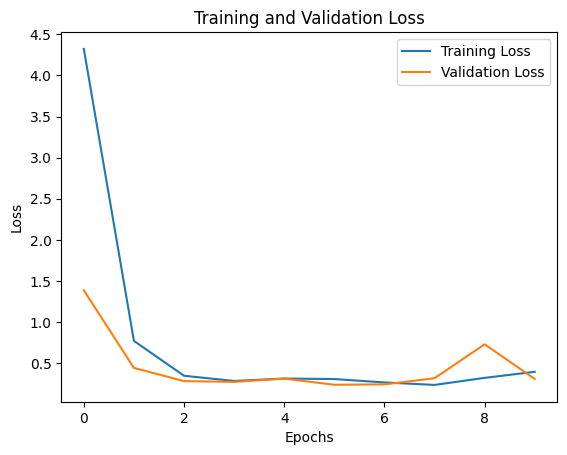

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


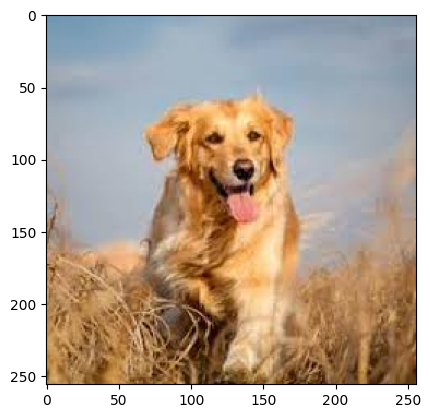

In [51]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image and resize to match training input
img = image.load_img("helo.jpg", target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale
plt.imshow(img)



In [52]:
prediction = model.predict(img_array)
print(prediction[0][0])
if prediction >= 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
0.96499157
Prediction: Dog


In [33]:
from google.colab import files
uploaded = files.upload()


Saving c.jpg to c.jpg
Saving b.jpg to b.jpg
Saving ccc.jpg to ccc.jpg
Saving helo.jpg to helo.jpg
Saving aa.jpg to aa.jpg
